# Project: Investigate **Medical Appointment No Shows** Dataset!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Importing Libraries and Modules

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

I decided to walk through the **Medical Appointment No Show** Dataset  which contains examples of medical appointments with some characteristics included a target attribute that informs us if the person went to the appointment or not. 
To dive deep into detailed info about the dataset, check Kagge Documentation [Here](https://www.kaggle.com/joniarroba/noshowappointments)

The most intuitive question to ask about this dataset is **Which Factors/characteristics can help us to predict if someone will show up for the scheduled?**

Apart from this project, if we couild find an accurate model that answer this question, we can use this model to help decision makers take a proactive response to optimize the waiting list and decrease unnecessary costs.

<a id='wrangling'></a>
## Data Wrangling

In this section, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis. Make sure that I document your steps carefully and justify your cleaning decisions.

### Loading Dataset

In [113]:
df = pd.read_csv("../input/noshowappointments/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [114]:
#check the shape of our dataset
df.shape

(110527, 14)

### check for cleanliness

In [115]:
# Checking for misssing values 
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Our data does not contain any misssing values, so no action needed for handling missing values and we can move forward to complete checking cleanliness.

In [116]:
# Lets explore our data types to see if any correction required or recommended?
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

It turns out that:
* Both `Scheduled Day` & `Appointment Day` are in object(string) format, so we should convert them into proper Data Time formate for convience and more richness of data. 
*` No Show`(Our Target attribute) is in object format, so we can convert it into Binary format for more convience during Analysis and it must be converted for ML workflow.

In [117]:
#Convert into Date Time format
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)


In [118]:
#Check if we the correction action was applied properly or not 
df.ScheduledDay.dtype, df.AppointmentDay.dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

Great, lets move forward!

In [119]:
#Check for duplicated observations
df.duplicated().sum()

0

There is no duplicated observations, so there is no correction action required. 
lets move forward.

In [120]:
#Checking for outliers in Age 
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

It turns out that :
* Min value is -1 which need to be either dropped or corrected. I will subjectively make a decision based on number of observations that has -1 value.
* Max value is 115 which is usually unaccepted and a correction action is recommended. I will subjectively consider any value above 100 is an outlier that need to be dropped or corrected based on number of obseravtions that are above 100. 
* Median & Mean is almost equal which indecate that the distribution is not skewed. More details about distibution will be discussed in EDA part of this notebook.

In [121]:
# Calc No of outliers in Age
neg = df[df['Age'] <=0]
hi = df[df['Age'] > 100]

neg.shape[0], hi.shape[0]

(3540, 7)

It turns out that :
* we have only 7 valuses above 100, so it is not big deal whether to drop them or correct them or even keep them!. I prefe to keep them to see if there is a specific pattern between very old patients and show up for their Appointment or no ?
* We have 3540 patients with age less than or equal 0! which need further analysis to see how many of them have negative values and how many of them have 0 value.
* In real world scenario, we must back to the source system which generate this value or the documentation of data gathering to see if zero value represent a missing value or represnt newborn with age less than 1 year ??
> since we have no direct access to this documentation, we can choose any of them subjectively without any preference.
> Another added value that we can gain from the source system, we can check if the Age attribute is missing by Random process or not ? this knowledge can help us to determine the appropiate method for handling the missing value to minimize the bias during the Modeling stage. 
> I prefer to keep the value of 0 as it is without any handling and I will calcualte the number of observations that have negative values.

In [122]:
# Calc negative value in Age
negative = df[df['Age'] <0]
negative.shape[0]

1

Since we have only one value of negative value, I will drop it.

In [123]:
#dropping negative values
df = df[df['Age'] != -1]


In [124]:
# Check if the Scheduled Day is unique or not ?
df.ScheduledDay.nunique()

103548

Since it almost unique values, its row format can not add any value and we need to enrich it by extracting Year, Month, Day, and Hour to see if this approach can increase its predictive power or not ?

In [125]:
#Extracing Year, Month, Day, and Hour from Scheduled Day datetime attribute
df["ScheduledDay_year"] = df.ScheduledDay.dt.year
df['ScheduledDay_month']= df.ScheduledDay.dt.month
df['ScheduledDay_week']= df.ScheduledDay.dt.week
df['ScheduledDay_day']= df.ScheduledDay.dt.day
df['ScheduledDay_hour']= df.ScheduledDay.dt.hour


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [126]:
#Check our data to see if the last editing wwas applied as we expected or not ?
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,17,29,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,17,29,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,17,29,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,17,29,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,17,29,16


Great! Lets apply the same logic to the `Appointment Day`

In [127]:
# Check if the Appointment Day is unique or not ?
df.AppointmentDay.nunique()

27

the `AppointmentDay` has only 27 unique valuse which means that we need to analyze it further befoe we decide to enrich it.
> Modeling wise, if we enrich it we will increase the dimensions of Dataset which might affect the performance of the model either by negative or postive impact. This trade-off is out of our scope.

<a id='eda'></a>
## Exploratory Data Analysis

Since `PatientId` and `AppointmentID` are Personally identifiable information, I will exclude them from Analysis. 
And they also did not add any value in modeling because they are unique values.PatientId

### Checking Discriptive Statistics 

In [17]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledDay_year,ScheduledDay_month,ScheduledDay_week,ScheduledDay_day,ScheduledDay_hour
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,2015.999439,4.823860,18.744621,14.252303,10.774542
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.023678,0.715795,2.802764,9.345638,3.216192
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,6.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,4.000000,17.000000,6.000000,8.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,19.000000,13.000000,10.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,5.000000,20.000000,22.000000,13.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.000000,12.000000,51.000000,31.000000,21.000000


It turns out that :
* `Scholarship`, `Hipertension`, `Diabetes` and `Alcoholism` are in Binary Format since they of integer type and min value = 0 and max = 1. It is expected because they indicate if patient has a disease or drink alcohol or not.
* `Handcap` is messy attribute since I do not know what does it mean? it may be Handicap (disability) ! and because all quantiles equal Zero but Max value equals 4!. It should be further analyzed.
* `SMS_received` is also binary format which indicate whether patient received SMS or not ?
* `Age` and `ScheduledDay` will be discussed later.

### Univariate Analysis

### ScheduledDay

1. **Year**

In [18]:
df.ScheduledDay_year.nunique()

2

We only have two unique values, so it will be very helpful if we check the balance between them.

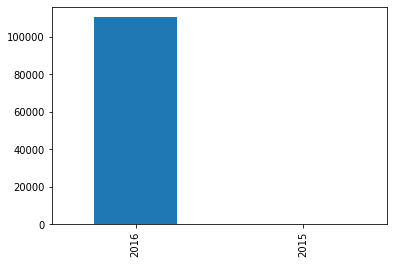

In [19]:
df.ScheduledDay_year.value_counts().plot(kind= 'bar');

It is obvious that there a great imbalance between the two values, so will calculate count per each of them.

In [20]:
df.ScheduledDay_year.value_counts()

2016    110464
2015        62
Name: ScheduledDay_year, dtype: int64

There is only 62 observations that were scheduled in 2015, so we can say that almost of observations were scheduled in 2016.

2. **Month**

In [21]:
df.ScheduledDay_month.describe()

count    110526.000000
mean          4.823860
std           0.715795
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max          12.000000
Name: ScheduledDay_month, dtype: float64

It is clear that most of observations are present in two months only ( 4, 5) because the 25, 50, 75 quantiles take only 4 and 5 values. Lets visualize our results.

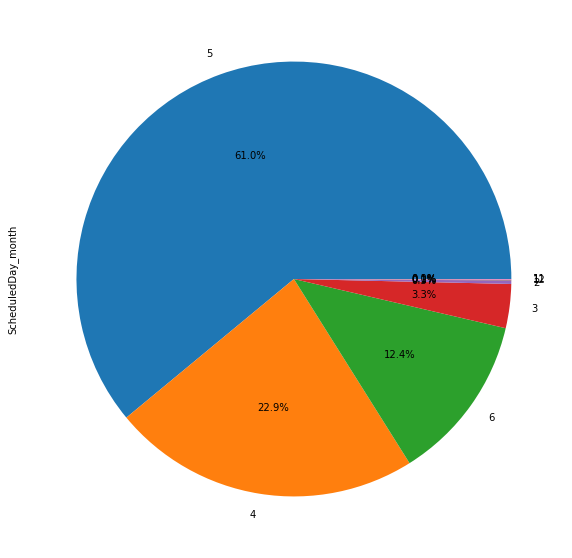

In [22]:
# because we want to visualize a static variable to show its composition, Pie chart will be more handy!
df.ScheduledDay_month.value_counts().plot(kind= 'pie', autopct='%1.1f%%', figsize=(10,10));

3. **Day**

In [23]:
df.ScheduledDay_day.describe()

count    110526.000000
mean         14.252303
std           9.345638
min           1.000000
25%           6.000000
50%          13.000000
75%          22.000000
max          31.000000
Name: ScheduledDay_day, dtype: float64

It turns out that `day` attribute is high dimensional and it is not skewed because mean and median is almost equal and the IQR is spread.
So, lets visualize it using Histogram. 

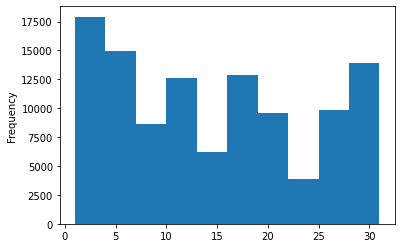

In [24]:
df.ScheduledDay_day.plot(kind='hist');

As expected from the desriptive statistics, the `Day` is not skewed and it is high dimensional.

4. **Hour**

In [25]:
df.ScheduledDay_hour.describe()

count    110526.000000
mean         10.774542
std           3.216192
min           6.000000
25%           8.000000
50%          10.000000
75%          13.000000
max          21.000000
Name: ScheduledDay_hour, dtype: float64

It turns out that the `hour` attribute is also high dimensional, however the IQR is relativelly not spread (6:13) , so lets dive deep visually.

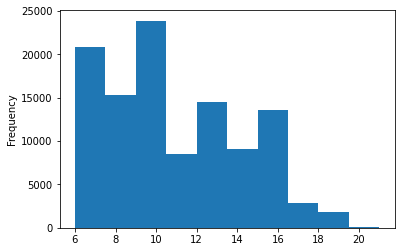

In [26]:
df.ScheduledDay_hour.plot(kind= 'hist');

As expected, the `hour` attribute is relatvely skewed and it is also expected becaue people will not schedule a medical appointment during night.

### Age

<AxesSubplot:ylabel='Frequency'>

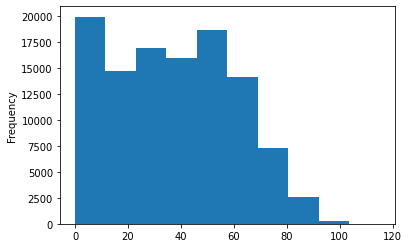

In [27]:
df.Age.plot(kind='hist')

It is clear that `Age` attribute is skewed and even if we droped the Zeros value, it will still skewed.


<AxesSubplot:>

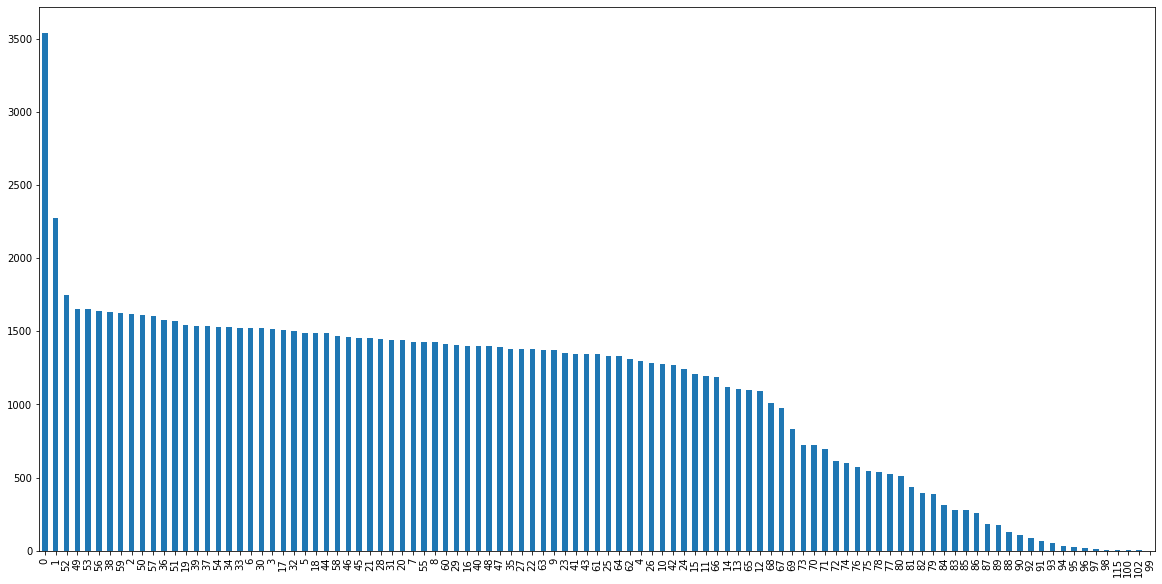

In [28]:
df.Age.value_counts().plot (kind= 'bar', figsize=(20,10))

The value counts follow an exponontial pattern which indicates that Log Transformation will be a proper remedy for this variance problem in Modeling stage.

### Hipertension, Diabetis , Alcoholism, and Scholarship

Because those 4 attributes are binary, lets check their distribution using Pie chart

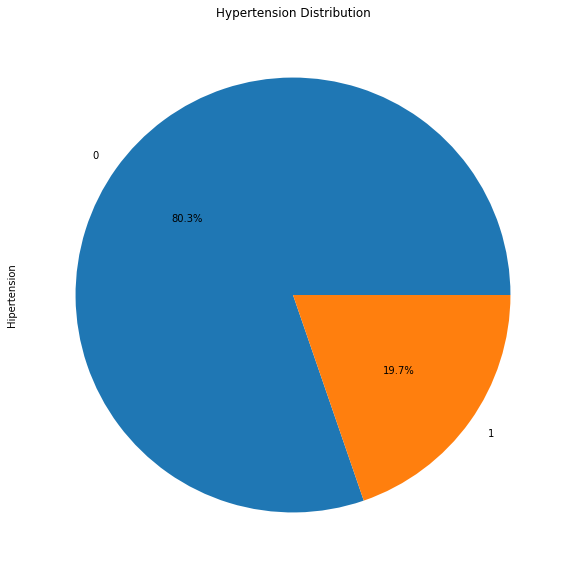

In [29]:
# lets start with 
df.Hipertension.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Hypertension Distribution');

It is clear that about 80 % of persons in the dataset are not suffering from Hypertension.

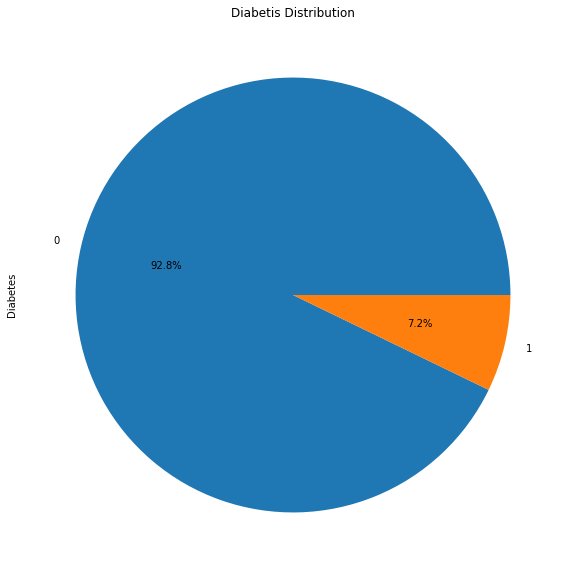

In [30]:
df.Diabetes.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Diabetis Distribution');

about 93 % of persons do not suffer from Diabetis 

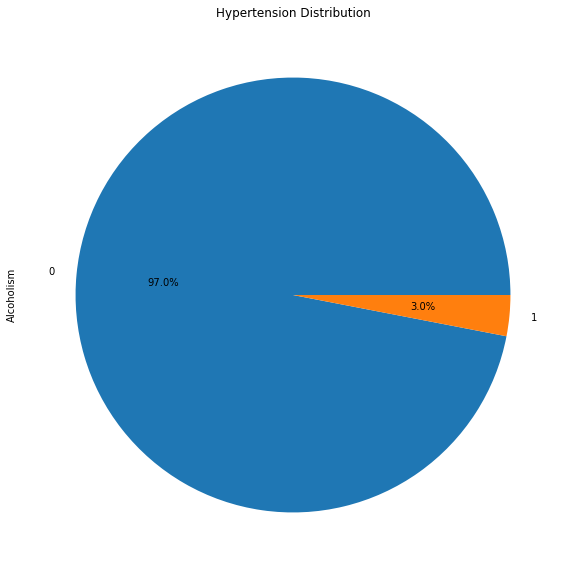

In [31]:
df.Alcoholism.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Hypertension Distribution');

Only 3 % of person drink alcohol.

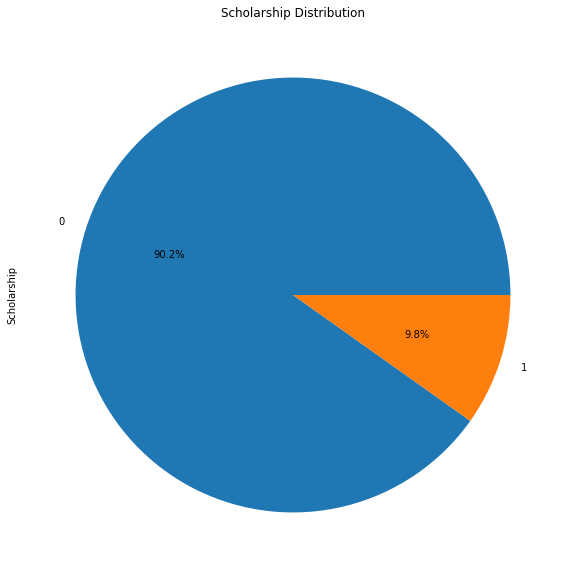

In [32]:
df.Scholarship.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Scholarship Distribution');

About 90 % of persons do not receive Scholarships

### Handcap

In [33]:
# Checking descriptive statistics 
df.Handcap.describe()

count    110526.000000
mean          0.022248
std           0.161543
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handcap, dtype: float64

As we mentioned before, it seems that almost all observations take the Zero value because all quantiles equal to zero

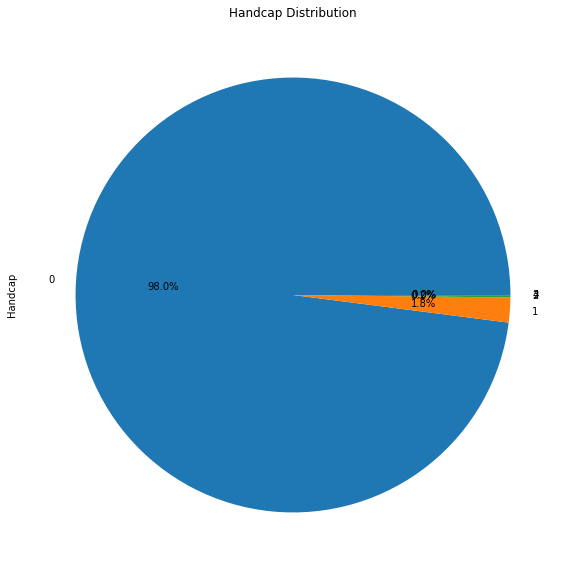

In [34]:
df.Handcap.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Handcap Distribution');

98 % of values equal Zero 

### **No Show**      (   our**Target** )

<AxesSubplot:>

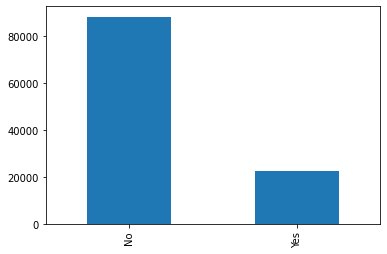

In [35]:
# Checking imbalance between our Target values
df['No-show'].value_counts().plot(kind='bar')

It is clear that our dataset is imbalanced.
So, lets calculate the percentage of cases per each class

In [36]:
class_no = round(100 * df['No-show'].value_counts()[0]/df.shape[0])
class_yes = round(100 * df['No-show'].value_counts()[1]/df.shape[0])
print(f'Percentage of cases per class no is {class_no}%')
print(f'Percentage of cases per class yes is {class_yes}%')

Percentage of cases per class no is 80%
Percentage of cases per class yes is 20%


This significant imbalance need to be handeled during modeling stage to maintain generalization and meet the business requirements.
> modeling is out of our scope in this notebook.

## Bivariate Analysis 

Lets check the correlation between each variable and our Target variable. 
> This correlation gives us an indication about the strength of the linear relationship among all variables.

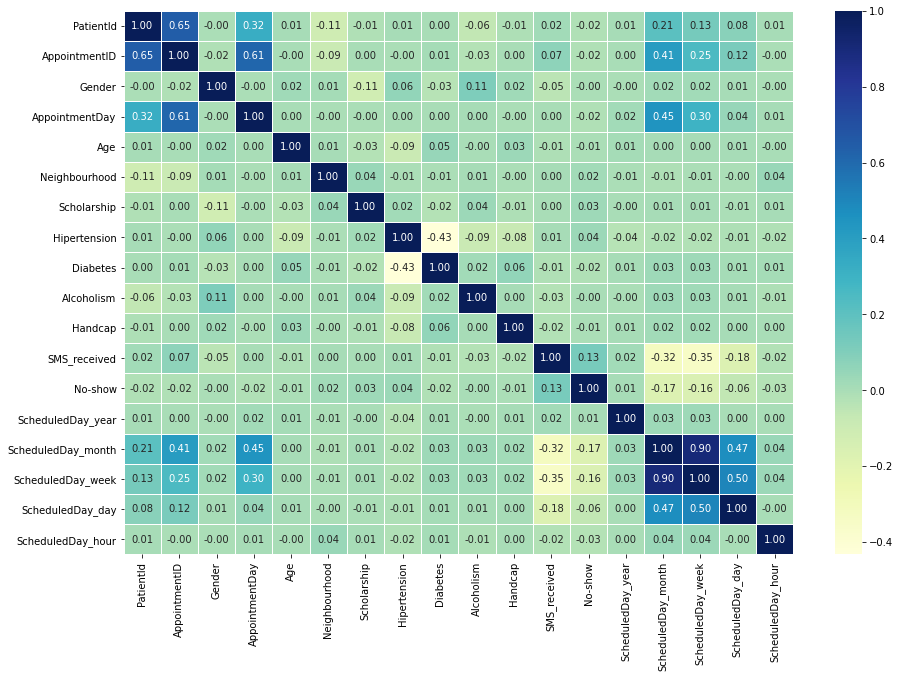

In [37]:
# Lets visualize correlation matrix using the heatmap instead of looking at the correlation coeffiecients only!

corr_max = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) # to include non-numerical features

fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_max,
              annot = True,
              linewidth = 0.5,
              fmt = ".2f",
              cmap = "YlGnBu")


It turns out that there is no **linear** relationship between any variable and the Target.
We should use scatter plot to explore if there is any other pattern exist between each variable and our Target or not ?
> There is a stong linear relationship (colinearity ) between `Scheduled month` & `Scheduled week` which might affect the performance of models that assume independence among variables. 

In [38]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'No-show', 'ScheduledDay_year',
       'ScheduledDay_month', 'ScheduledDay_week', 'ScheduledDay_day',
       'ScheduledDay_hour'],
      dtype='object')

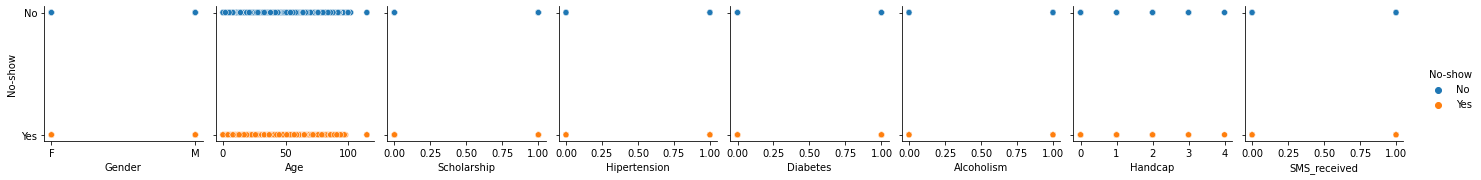

In [39]:
#Scatter plots between each variable against each class of Target attribute 
# I will divide variable into two groups for more convenience
group_1= ['Gender', 'Age', 'Scholarship','Hipertension','Diabetes','Alcoholism','Handcap', 'SMS_received']
group_2= ['AppointmentDay', 'ScheduledDay_year', 'ScheduledDay_month', 'ScheduledDay_week','ScheduledDay_day', 'ScheduledDay_hour']
pp = sns.pairplot(data=df,
                  y_vars=['No-show'],
                  x_vars= group_1, hue='No-show')


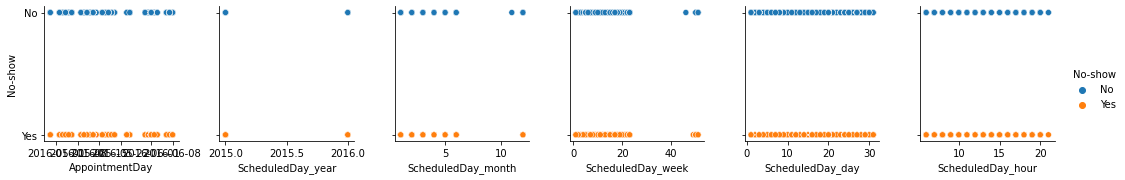

In [40]:
#scatter plot for group_2
pp2 = sns.pairplot(data=df,
                  y_vars=['No-show'],
                  x_vars= group_2, hue='No-show')

It is clear that we can not see any existing pattern from the scatter plot which suggest that we need to do multivariate analysis and/or feature engineering to be able to catch any relationship.
> one suggested feature engineering may be the period between the Scheduled time and the appointment time. This feature engineering is heuristic-based, and we can use other feature engineering like polynomial transformation and Cartisian product to enrich our dataset if the model's performance was unsatisfied. 
> * Since we focus here in analysis not modeling, I will only add a `waiting time` feature that I hope to capture any relationship with the target!

In [128]:
# Enrich Dataset by adding waiting time in Days 
df['WaitingTime_days']= ((df['AppointmentDay']) - (df['ScheduledDay'])).dt.days


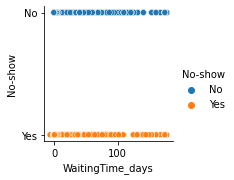

In [130]:
# Plotting scatter plot of WaitingTime in Days against our Target.
pp3 = sns.pairplot(data=df,
                  y_vars=['No-show'],
                  x_vars= 'WaitingTime_days', hue='No-show')

Unfortunately, There is also no clear pattern seen on this plot, hence, we will try to catch any pattern via multivariate analysis!

### Multivariate Analysis

Lets filter our dataset into `health people` & `diseased people`.
* people without any disease will be described as **Healthy** 
* people with at least one disease will be described as **Diseased**

In [150]:
# lets query our dataset to filter people out 
healthy_people= df.query('Hipertension  == 0 & Diabetes == 0 & Alcoholism == 0 & Handcap == 0 ')
diseased_people = df.query('Hipertension  == 1 | Diabetes == 1 | Alcoholism == 1 | Handcap > 0 ')
# lets check the count of every class of people which help us to be more confident about our findings
healthy_people.shape[0], diseased_people.shape[0]

(84114, 26412)

Now, lets figure out if there is a relationship between having a disease & showing up for the appointment.
> becuase we try to find the distribution of our target classes within each group of people, it will be more handy to use pie chrat. 

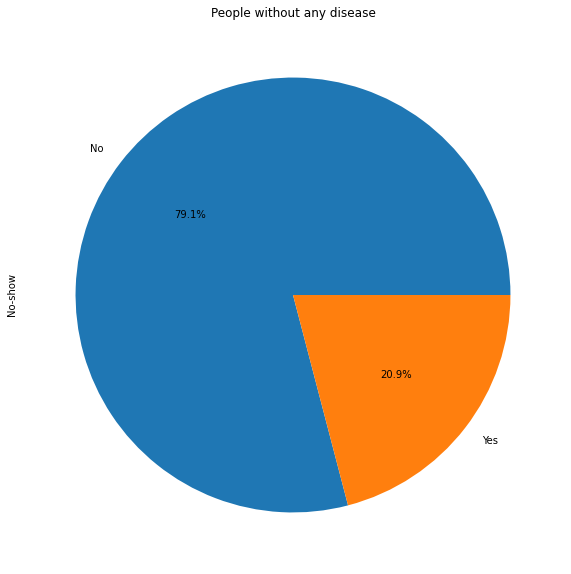

In [148]:
healthy_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'People without any disease');


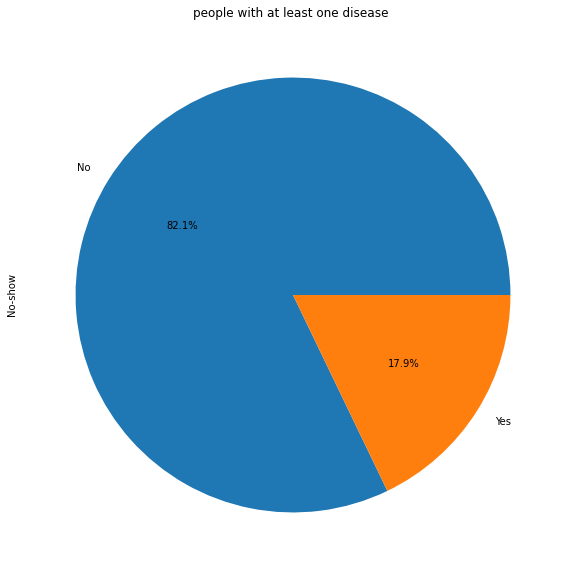

In [149]:
diseased_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'people with at least one disease ');

It is clear that there is a minor effect of having a disease and showing up in the appointment because about 82 % of diseased people were shown up compared to 79 % of healthy people who show up. However, the No of diseased people is relatively smaller than No of healthy people. This should make us less confident about our findings because a limitation exists.

**Does filtering by `Age` can help us recognize any pattern within `Healthy people` & `Diseased people` ?**
>To answer this question we can calculate the median age of each group and compare older people versus younger people.
* for this purpose, we will consider younger people are less than or equal to the median of age and older people are those larger than the median.

In [188]:
# calculate the median of age within healthy people
healthy_age = healthy_people.Age.median()
healthy_age

29.0

In [184]:
# filter healthy people by  their age's median 
healthy_younger_people = healthy_people.query('Age <= 29')
healthy_older_people = healthy_people.query('Age > 29')
healthy_younger_people.shape[0], healthy_older_people.shape[0]

(43026, 41088)

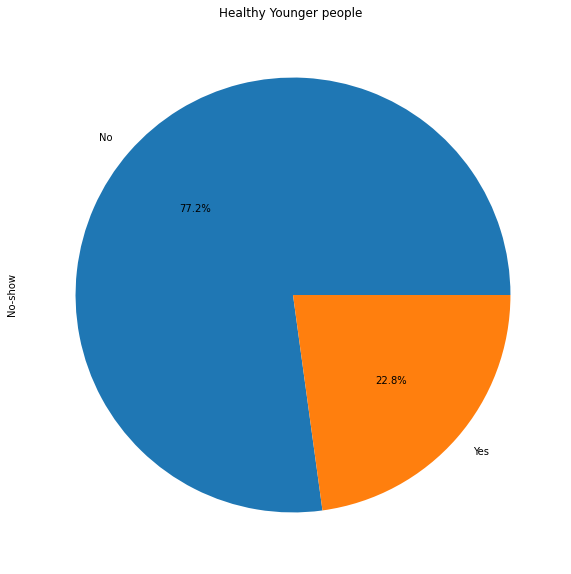

In [197]:
healthy_younger_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Healthy Younger people ');

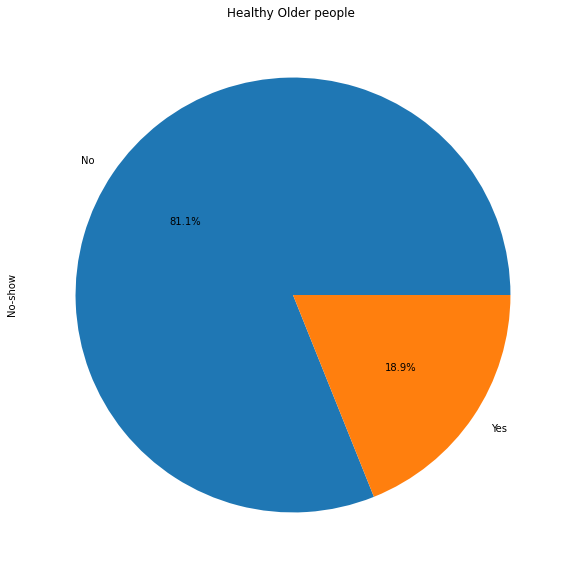

In [194]:
healthy_older_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Healthy Older people ');

From the previous pie charts and Because the size of the two groups almost equal, we can say that older healthy people are more likely to show up than younger ones. 

> Lets apply the same logic on the diseased people group 

In [189]:
# calculate age median
diseased_age = diseased_people.Age.median()
diseased_age

59.0

In [190]:
# filter by age
diseased_younger_people = diseased_people.query('Age <= 59')
diseased_older_people = diseased_people.query('Age > 59')
diseased_younger_people.shape[0], diseased_older_people.shape[0]

(13840, 12572)

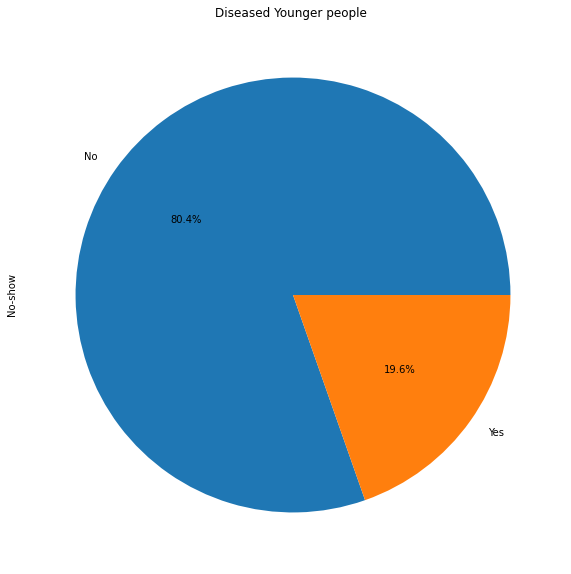

In [196]:
diseased_younger_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Diseased Younger people ');

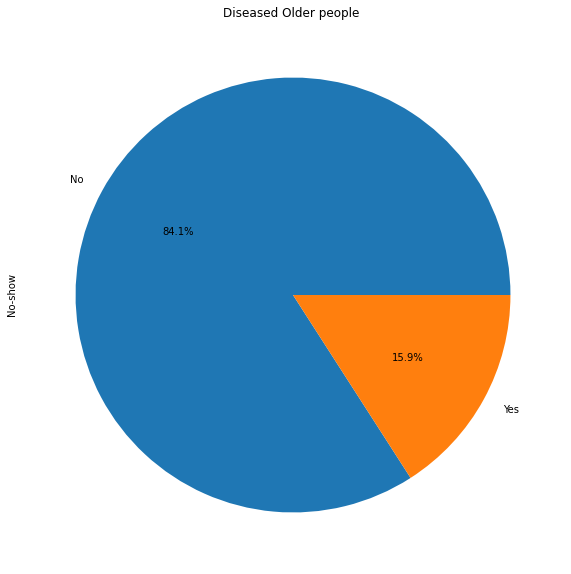

In [198]:
diseased_older_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Diseased Older people ');

By the same way, we can say that older diseased people are more commitment than younger ones.
> It turns out that we can say that in general, older people are more likely to show up than younger people. Howevre, we should filter the whole dataset by Age to be more confident about this insight because we use two different median values here. 
* So, lets try to figure it out.

In [199]:
#calculate the median of age for the whole dataset
age_median = df. Age.median()
age_median 

37.0

In [200]:
# filter the whole dataset by the age 
younger_people = df.query('Age <= 37')
older_people= df.query('Age >37')

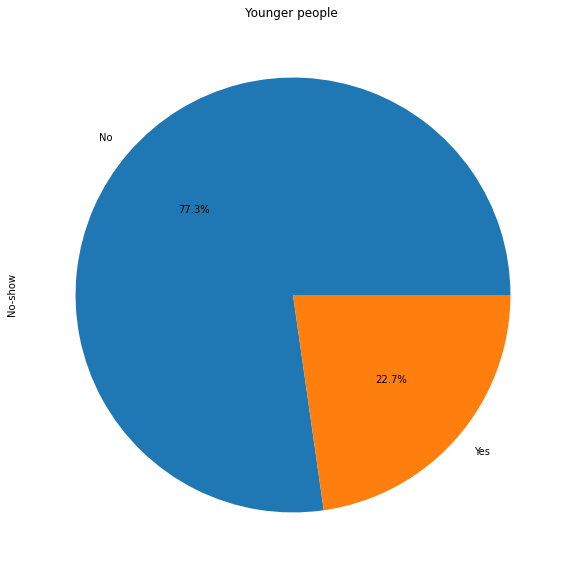

In [203]:
younger_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'Younger people ');

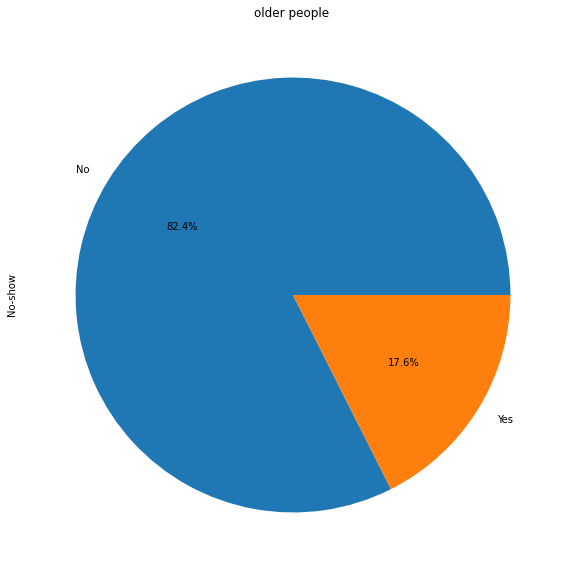

In [204]:
older_people['No-show'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10), title= 'older people ');

As we expected, the older people are more commitment to their appointment more than younger people.
> There might be complex relationships to be explored, however, it is my first trial which I think it is quite sufficient to submit this first version for review. 
* Now, it is time to write a conclusion that summarize the work we have done.

<a id='conclusions'></a>
## Conclusions

Our workflow through this notebook was divided into 3 main steps which are **Introduction** || **Data Wrangling** || **EDA**

### Introduction 
In this step, we do the following :
 1. Importing the needed **Libraries & Modules** that help us achieve our tasks.
 2. Roling out the selected Dataset and talking briefly about it. 
 3. Formulating an intuitive question **Which Factors/characteristics can help us to predict if someone will show up for the scheduled?**

### Data Wrangling
In this step, we do the following :
1. Loading our **Dataset**.
2. Checking for **cleanliness** and do the required cleansing.
3. **Enriching** dataset by doing some feature engineering.

### EDA 
In this step, we did some **Univarariate & Bivariate & Multivariate** analysis which help use drive this insights about our question :
1. There is no any significant relationship between any **single** variable and our Target attribute.
2. In general, people with older ages are more likely to show up for their Appointment. 
3. Older people having at least one disease are also more likely to show up for their Appointment. 
4. Diseased people might be more likely to show up than healthy people. 


#### So, we can say that **Age** and having a **Disease** might be the main **Factors** that control whethere a person will show up or not ?
>**Disclaimer**: As we mentioned earlier, there might be other hidden relationship that we did not dig for!


### limitations 
Since we have not done any statistical tests in this analysis, we can not imply any statistical conclusions as well as we can not imply any causation from our correlation findings. 